<font color='lime'>

# Model training and parameter selection with Grid Search

</font> 

<font color='yellow'>

## Support Vector Machine (SVM)

</font> 

<font color='orange'>

### Load the data

</font> 

In [3]:
import pandas as pd

file_path = 'data/spotify_songs_with_mood.csv'
data = pd.read_csv(file_path)

<font color='orange'>

### Separate to subsets and train 

</font> 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Define the features (X) and the target (y)
X = data.drop(columns=['mood', 'track_id', 'track_name', 'track_artist', 'track_album_id', 
                       'track_album_name', 'track_album_release_date', 'playlist_name', 
                       'playlist_id', 'playlist_genre', 'playlist_subgenre'])
y = data['mood']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save the model
model_path = 'model/songs_mood_svm_model.pkl'
joblib.dump(svm_model, model_path)

# Predict the test set results
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# The path to the saved model and the accuracy
model_path, accuracy

('model/songs_mood_svm_model.pkl', 0.936887042806046)

<font color='yellow'>

## Model estimation

</font> 

<font color='orange'>

### A. Visualization of predicted values

</font> 

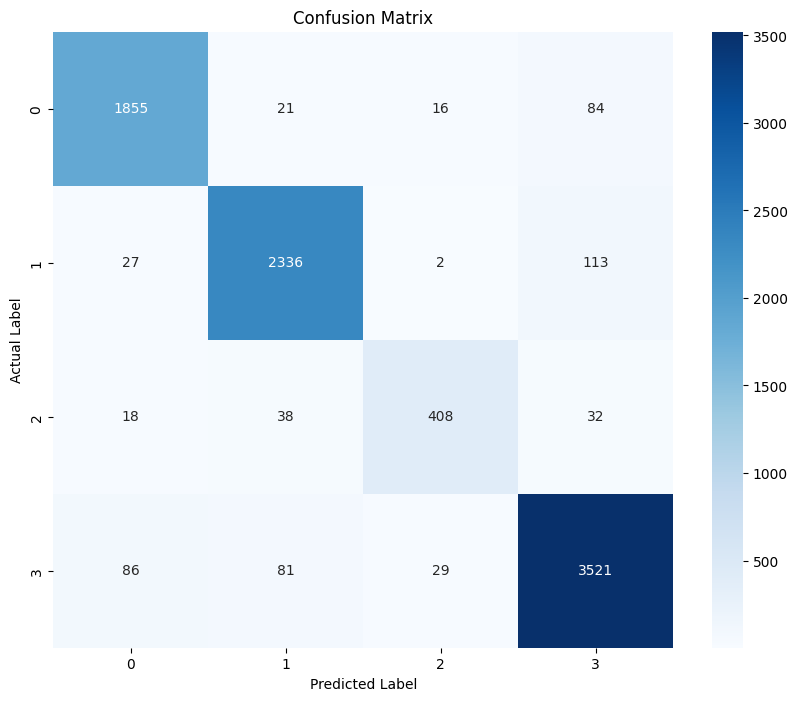

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# a. Visualization of predicted values with a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<font color='orange'>

### B. Prediction quality assessment (precision/recall/f1-score/ROC-AUC)

</font> 

In [6]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert to a dataframe for easier visualization
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
Calm,0.934038,0.938765,0.936396,1976.000000
Energetic,0.943457,0.942696,0.943076,2478.000000
Happy,0.896703,0.822581,0.858044,496.000000
Neutral,0.938933,0.947269,0.943083,3717.000000
accuracy,0.936887,0.936887,0.936887,0.936887
macro avg,0.928283,0.912828,0.920150,8667.000000
weighted avg,0.936694,0.936887,0.936690,8667.000000
